# Demo Notebook for Generating Minimum Jerk Trajectories (MJT) using CVXPY

This notebook demonstrates how to use the cvxpy/cvxopt modules to  generate 2D and 3D MJT trajectories with via-points. The positions and times for the via-points will need to be input to the solver to obtain the minimjum jerk solution.

**Note**: To execute this code change the variable "basedrive" to the correct folder addresss.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import sys
import json
import os

basedrive = "drive/My Drive/0_projects/IMU-Smoothness"
os.chdir(basedrive)
sys.path.append("scripts")

In [4]:
from imupaper.support_mjt import Djerk_matrix
from imupaper.support_mjt import Aeq_matrix
from imupaper.support_mjt import beq_column
from imupaper.support_mjt import plot_trajectory
from imupaper.support_mjt import generate_via_points_2D
from imupaper.support_mjt import generate_via_points_3D
from imupaper.support_mjt import minimum_effort_control_2D
from imupaper.support_mjt import minimum_effort_control_3D
from imupaper.support_mjt import extract_all_kinematics_2D
from imupaper.support_mjt import extract_all_kinematics_3D
from imupaper.support_mjt import extract_all_kinematics_2D_CVXPY
from imupaper.support_mjt import extract_all_kinematics_3D_CVXPY
from imupaper.support_mjt import minimum_effort_control_2D_CVXPY
from imupaper.support_mjt import minimum_effort_control_3D_CVXPY
from imupaper.support_mjt import plot_trajectory_2D
from imupaper.support_mjt import plot_trajectory_3D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

## 2D Reaching Kinematics

In [0]:
# setup sample rate
delta = 0.01  # sample rate
t = np.arange(0, 2, delta)  # one second worth of samples`
Ns = len(t)  # No. of samples.
dim = '2D'

In [0]:
via_points = generate_via_points_2D()

D_jerk = Djerk_matrix(Ns, dim)
A = Aeq_matrix(Ns, via_pt_times=via_points[:, 0], dim=dim)
b = beq_column(via_points, dim='2D')

# Solve.
_temp1 = minimum_effort_control_2D(D_jerk, A, b, Ns);
_, _temp2 = minimum_effort_control_2D_CVXPY(D_jerk, A, b, Ns);

In [0]:
# Extract kinematics
move1 = extract_all_kinematics_2D(_temp1, Ns, delta)
move2 = extract_all_kinematics_2D_CVXPY(_temp2, Ns, delta)

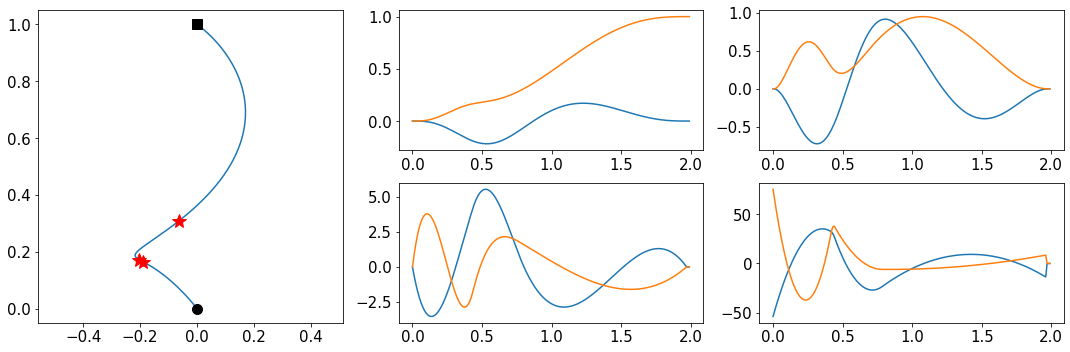

In [12]:
plot_trajectory_2D(move1, via_points, Ns, t)

## 3D Reaching Kinematics

In [0]:
# setup sample rate
delta = 0.005 # sample rate
t = np.arange(0, 2, delta)  # one second worth of samples`
Ns = len(t)  # No. of samples.
dim = '3D'

In [0]:
via_points = generate_via_points_3D()
D_jerk = Djerk_matrix(Ns, dim=dim)
A = Aeq_matrix(Ns, via_pt_times=via_points[:, 0], dim=dim)
b = beq_column(via_points, dim=dim)

# Solve.
_temp1 = minimum_effort_control_3D(D_jerk, A, b, Ns);
_, _temp2 = minimum_effort_control_3D_CVXPY(D_jerk, A, b, Ns);

In [0]:
# Extract kinematics
move1 = extract_all_kinematics_3D(_temp1, Ns, delta)
move2 = extract_all_kinematics_3D_CVXPY(_temp2, Ns, delta)

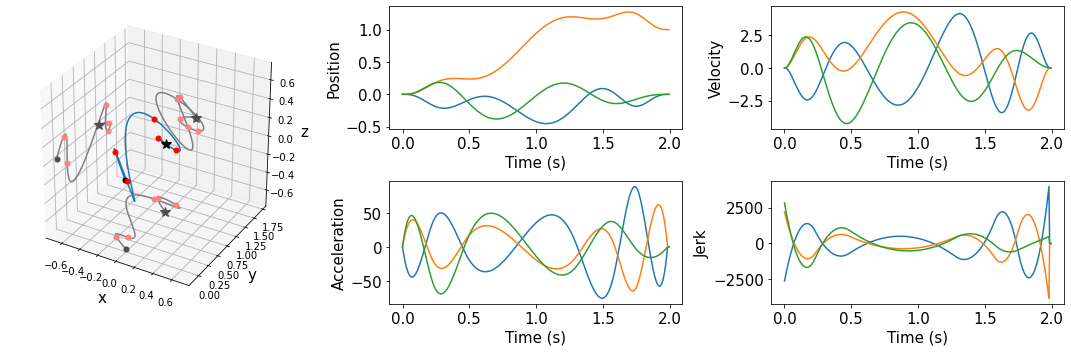

In [16]:
plot_trajectory_3D(move1, via_points, Ns, t)